In [2]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import pickle

/home/khyunjin1993/anaconda3/envs/towards_moe/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
cluster_all = torch.load('./dataset/s1_data/train_data.pt')
cluster_all_label = torch.load('./dataset/s1_data/train_labels.pt')
print(cluster_all.shape)

torch.Size([16000, 1, 200])


In [9]:
with open("./dataset/s1_data/train_cluster", 'rb') as f:
    a = pickle.load(f)

In [20]:
print(len(a[0]))
print(len(a[1]))
print(len(a[2]))
print(len(a[3]))

4035
3999
4006
3960


In [22]:
a_cluster_all = torch.flatten(cluster_all, start_dim=1)
a_cluster_all.shape

torch.Size([16000, 200])

In [23]:
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(a_cluster_all.cpu().numpy())

In [28]:
X_2d = X_2d/np.max(np.abs(X_2d))

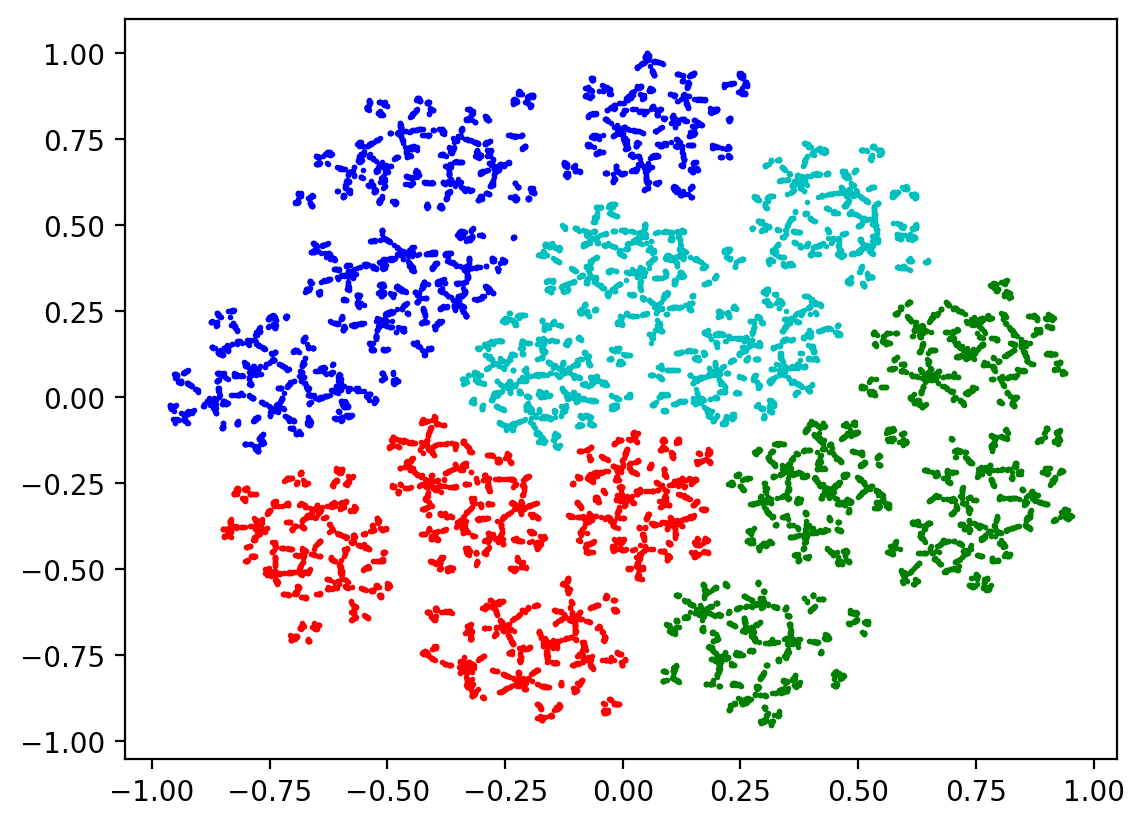

In [29]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(dpi=200)

for i in a[0]:
    ax.scatter(X_2d[i,0],X_2d[i,1], c='b', s=1)
for i in a[1]:
    ax.scatter(X_2d[i,0],X_2d[i,1], c='g', s=1)
for i in a[2]:
    ax.scatter(X_2d[i,0],X_2d[i,1], c='r', s=1)
for i in a[3]:
    ax.scatter(X_2d[i,0],X_2d[i,1], c='c', s=1)
#ax.legend(*scatter.legend_elements(), loc="upper right")
plt.show()